# Time Series

## Timestamps

`pandas` represents an instant in time using the `pandas.Timestamp` class:


In [3]:
import pandas as pd

# Create timestamps

pd.Timestamp(year=2025,
            month=10,
            day=16,
             hour=9,
             minute=57,
             second=20)

Timestamp('2025-10-16 09:57:20')

In [4]:
pd.Series([pd.Timestamp(2020, 10, 16),
          pd.Timestamp(2020, 10, 17),
          pd.Timestamp(2020, 10, 18)])

0   2020-10-16
1   2020-10-17
2   2020-10-18
dtype: datetime64[ns]

# Data exploration

Reading in the data and taking a look at it.

In [7]:
# REad in precipitation data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'

precip =pd.read_csv(URL)
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

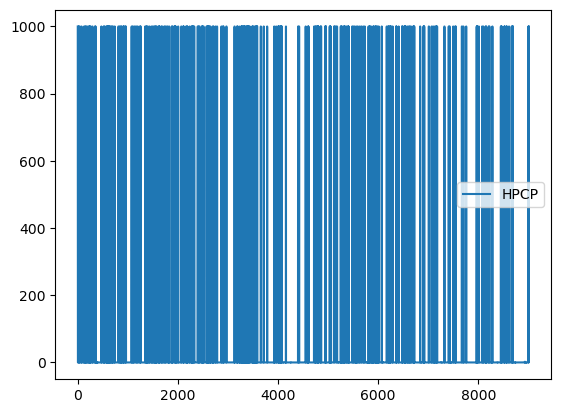

In [8]:
# plot hourly precipitation in Boulder

precip.plot()
# Wack

## Read in missing data values

Metadata indicates missing values re 999.99
We can directly read in this value as an NA value using `pd.read_csv`

In [17]:
# REad in teh CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values = [999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

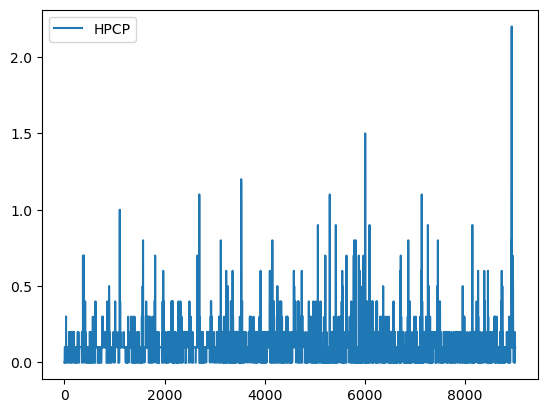

In [12]:
precip.plot()

## Convert strings into dates

Notice `DATE` column is not a type `datetime`

In [13]:
# Check whether date column is of type datetime

precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [18]:
# Convert date column to time stamps
precip['DATE'] = pd.to_datetime(precip['DATE'])

In [20]:
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<Axes: xlabel='DATE'>

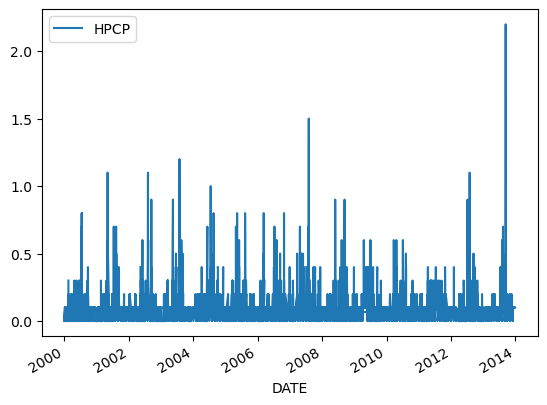

In [21]:
precip.plot(x = 'DATE', y = 'HPCP')

In [22]:
precip = precip.set_index('DATE')

precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Read in dataset in specific format

In [26]:
precip = pd.read_csv(URL, 
                     na_values = [999.99],
                     parse_dates = ['DATE'],
                     index_col = ['DATE'])
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Subsetting by date

We can use `.loc['year-month']` to select data from specific year and month

In [28]:
# Select
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [29]:
# Select 2013 

precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

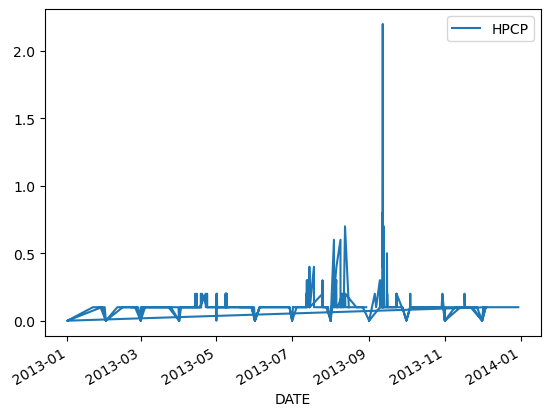

In [30]:
precip.loc['2013'].plot()

# REsample

Resampling a tyime series mean converting a time seires from one frequency to another, For example, monthly to yearly (downsampling) or weekly to daily (upsampling)

We can resample with the `resample()` method The simplest use is to call:

```
df.resample(new_frequecy).aggregator_function()
```
Where:
- `new_frequency`: is a tring representing the new frequence to resample the dataa: "D" for day, "W" for week, "Y" for year, "m" for month
- `aggregator_function()`: is the function we will use the aggreate the data into new frequency. For example, `max()`, `min()`, `sum()`, `mean()`.

### Example
OUr 2013 data has hourly frequncy, we want to resample it to daily frequency (downsampling)

In [33]:
# REsample 2013 from hourly data to daily data

daily_precip_2013 = precip.loc['2013'].resample('D').sum()
daily_precip_2013.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01,COOP:050183COOP:055881COOP:050183COOP:055121CO...,ALLENSPARK 2 SE CO USNEDERLAND 5 NNW CO USALLE...,0.0,]g[gg,
2013-01-02,0,0,0.0,0,0
2013-01-03,0,0,0.0,0,0
2013-01-04,0,0,0.0,0,0
2013-01-05,0,0,0.0,0,0


<Axes: title={'center': 'Precipitation in Boulder, CO during 2013'}, ylabel='daily precipitation( (in))'>

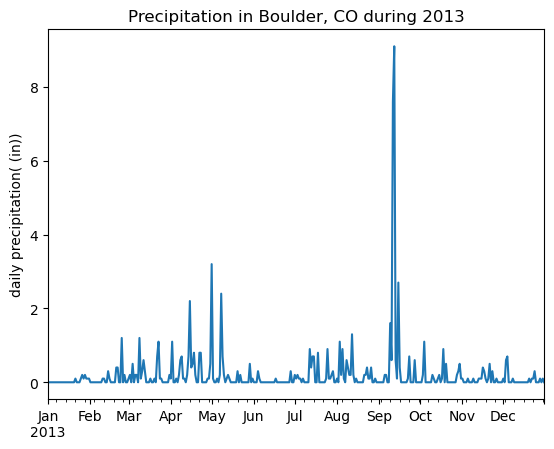

In [38]:
daily_precip_2013.plot(ylabel = 'daily precipitation( (in))',
                      title = "Precipitation in Boulder, CO during 2013",
                       xlabel = '',
                      legend = False)

<Axes: title={'center': 'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

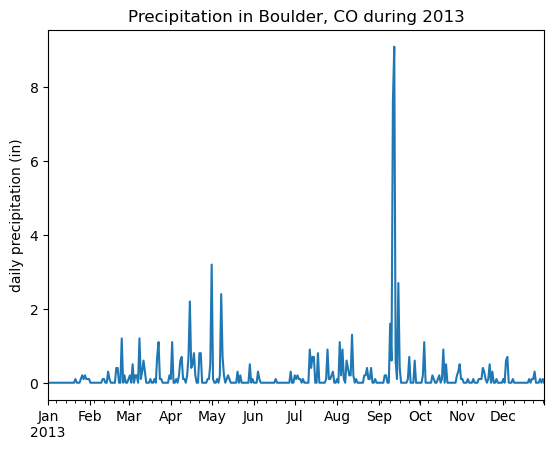

In [39]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)